# Customer Churn Analysis

##### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('customer_churn_analysis.csv')

In [3]:
pd.set_option('display.max_columns',None)#To see the all columns in dataset
df.head()#To Display the top 5 rows only

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
#shape of the dataset
df.shape

(7043, 21)

7043 rows and 21 columns

In [5]:
#variable 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### About Columns:-

###### 1.customerID

In this column the customer unique id.

###### 2.Gender

In this column contain the customer gender

###### 3.SeniorCitizen

In this column contain that if the customer is senior citizen or not

###### 4.Partner

If the customer have Partner or not

###### 5.Dependents

If the customer is dependents or not

###### 6.tenure

In this column contain the tenure

###### 7.PhoneService

Did have any Phone Service to customer or not

###### 8.MultipleLines

In this have multiple lines to connect the customer

###### 9.InternetService

If customer have internet Service or not

###### 10.OnlineSecurity

If customer have online security or not

###### 11.OnlineBackup

If customer have online Backup or not

###### 12.DeviceProtection

If cutomer device have protection or not

###### 13.TechSupport

If customer have Technical support or not

###### 14.StreamingTV

If customers are Streaming TV or not

###### 15.StreamingMovies

If customers are streaming movies or not

###### 16.Contract

Number of years that customer contract with us

###### 17.PaperlessBilling

If we provide to customer paper less billing or not

###### 18.PaymentMethod

Customer payment method after shopping

###### 19.MonthlyCharges

Monthly charges on customer

###### 20.TotalCharges

Total charges on customer

###### 21.Churn

Target variable . if customer is churn or not

In [6]:
#checking datatype of all variables
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

SeniorCitizen and tenure variables are integer type,MonthlyCharges variable are float type and Others are object type

In [7]:
#checking Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
Empty DataFrame
Columns: [customerID, gender, Sen

In [8]:
#There is Empty spaces in TotalCharges variable
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)#Empty space replace with ? 

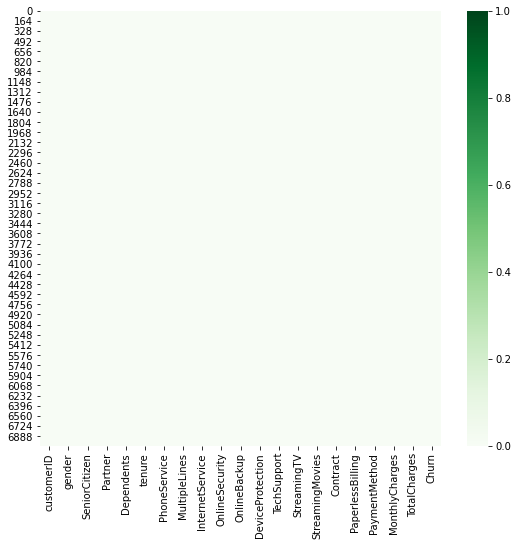

In [9]:
#Checking null values using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Greens');

In [10]:
#checking null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Simple Imputer

In [11]:
#full the null values using simple imputer
from sklearn.impute import SimpleImputer

In [12]:
imputer=SimpleImputer(strategy='most_frequent')

In [13]:
df['TotalCharges']=imputer.fit_transform(df['TotalCharges'].values.reshape(-1,1))

In [14]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking Dataset Information

In [15]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###### Observations:-

1. RangeIndex: 7043 entries, 0 to 7042
2. Data columns (total 21 columns)
3. There is no null values in dataset
4. dtypes: float64(1), int64(2), object(18)
5. memory usage: 1.1+ MB

In [16]:
#nuniques of dataset
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### More deatils About Variables

In [17]:
#unique values
print(df['customerID'].unique())
#count the unique values
print(df['customerID'].value_counts())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
5393-HJZSM    1
9074-KGVOX    1
7636-OWBPG    1
0096-FCPUF    1
3913-FCUUW    1
             ..
0181-RITDD    1
2921-XWDJH    1
9932-WBWIK    1
2039-JONDJ    1
3892-NXAZG    1
Name: customerID, Length: 7043, dtype: int64


Each customer as one unique customer ID

In [18]:
#unique values
print(df['gender'].unique())
#count the unique values
print(df['gender'].value_counts())

['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64


There are types of genders Male and Female 

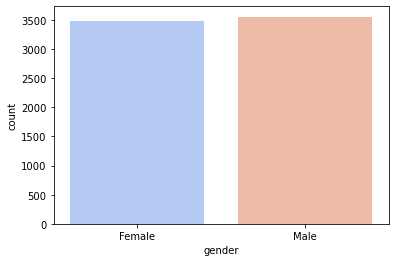

In [19]:
#count plot
sns.countplot(df['gender'],palette='coolwarm');

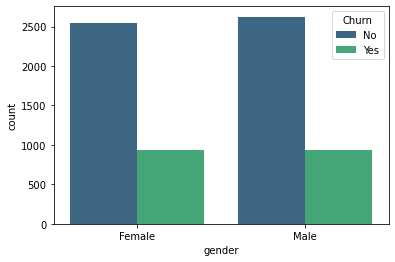

In [20]:
#plot count plot with hue=Churn
sns.countplot('gender',hue='Churn',palette='viridis',data=df);

Both Male And Female is same Churn

In [21]:
#unique values
print(df['SeniorCitizen'].unique())
#count the unique values
print(df['SeniorCitizen'].value_counts())

[0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


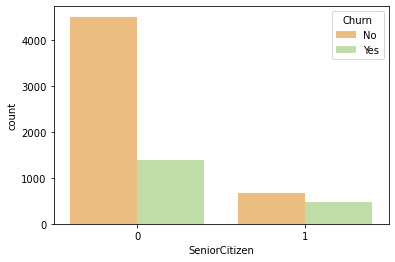

In [22]:
#plot count plot with hue=Churn
sns.countplot('SeniorCitizen',hue='Churn',palette='Spectral',data=df);

In [23]:
#unique values
print(df['Partner'].unique())
#count the unique values
print(df['Partner'].value_counts())

['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64


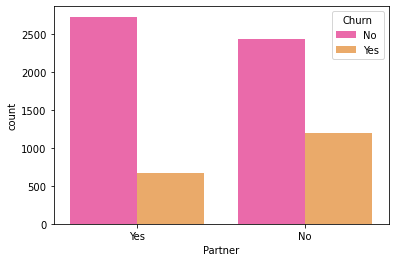

In [24]:
#plot count plot with hue=Churn
sns.countplot('Partner',hue='Churn',palette='spring',data=df);

In [25]:
#unique values
print(df['Dependents'].unique())
#count the unique values
print(df['Dependents'].value_counts())

['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64


Independents cutomers are many here

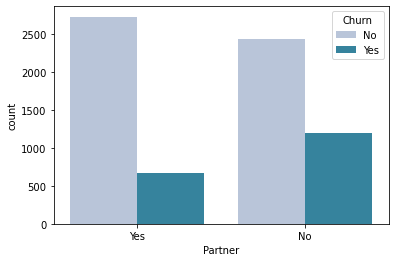

In [26]:
#plot count plot with hue=Churn
sns.countplot('Partner',hue='Churn',palette='PuBuGn',data=df);

In [27]:
#unique values
print(df['tenure'].unique())
#count the unique values
print(df['tenure'].value_counts())

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


In [28]:
#unique values
print(df['PhoneService'].unique())
#count the unique values
print(df['PhoneService'].value_counts())

['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64


Phone Service customers are many here

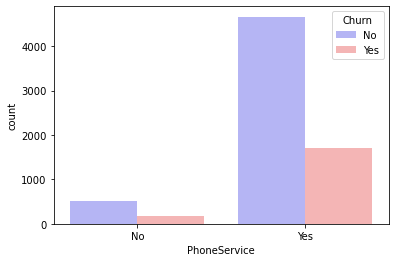

In [29]:
#plot count plot with hue=Churn
sns.countplot('PhoneService',hue='Churn',palette='bwr',data=df);

In [30]:
#unique values
print(df['MultipleLines'].unique())
#count the unique values
print(df['MultipleLines'].value_counts())

['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


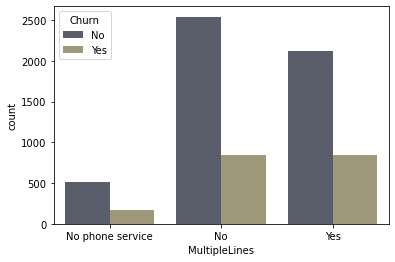

In [31]:
#plot count plot with hue=Churn
sns.countplot('MultipleLines',hue='Churn',palette='cividis',data=df);

In [32]:
#unique values
print(df['InternetService'].unique())
#count the unique values
print(df['InternetService'].value_counts())

['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


#### Feature Engineering

In [33]:
df['InternetService']=df['InternetService'].replace('DSL','Yes')#Both DSL and Fiber optic is Internet Service 
df['InternetService']=df['InternetService'].replace('Fiber optic','Yes')

In [34]:
#unique values
print(df['InternetService'].unique())
#count the unique values
print(df['InternetService'].value_counts())

['Yes' 'No']
Yes    5517
No     1526
Name: InternetService, dtype: int64


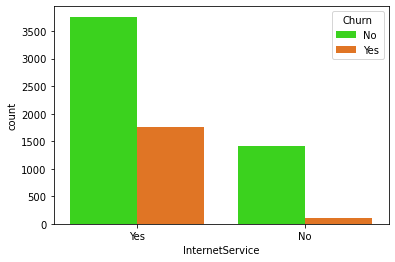

In [35]:
#plot count plot with hue=Churn
sns.countplot('InternetService',hue='Churn',palette='gist_ncar',data=df);

In [36]:
#unique values
print(df['OnlineSecurity'].unique())
#count the unique values
print(df['OnlineSecurity'].value_counts())

['No' 'Yes' 'No internet service']
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


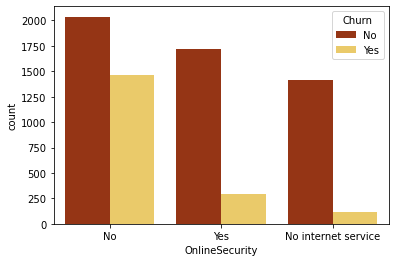

In [37]:
#plot count plot with hue=Churn
sns.countplot('OnlineSecurity',hue='Churn',palette='afmhot',data=df);

In [38]:
#unique values
print(df['OnlineBackup'].unique())
#count the unique values
print(df['OnlineBackup'].value_counts())

['Yes' 'No' 'No internet service']
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


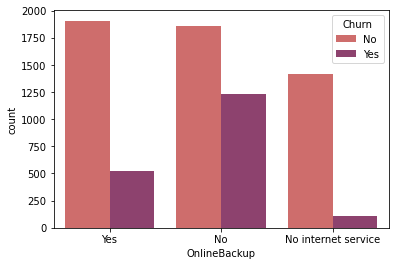

In [39]:
#plot count plot with hue=Churn
sns.countplot('OnlineBackup',hue='Churn',palette='flare',data=df);

In [40]:
#unique values
print(df['DeviceProtection'].unique())
#count the unique values
print(df['DeviceProtection'].value_counts())

['No' 'Yes' 'No internet service']
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


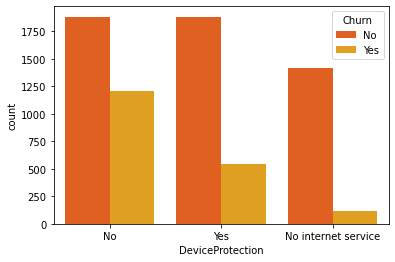

In [41]:
#plot count plot with hue=Churn
sns.countplot('DeviceProtection',hue='Churn',palette='autumn',data=df);

In [42]:
#unique values
print(df['TechSupport'].unique())
#count the unique values
print(df['TechSupport'].value_counts())

['No' 'Yes' 'No internet service']
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


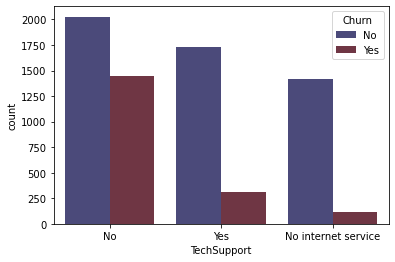

In [43]:
#plot count plot with hue=Churn
sns.countplot('TechSupport',hue='Churn',palette='icefire',data=df);

In [44]:
#unique values
print(df['StreamingTV'].unique())
#count the unique values
print(df['StreamingTV'].value_counts())

['No' 'Yes' 'No internet service']
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


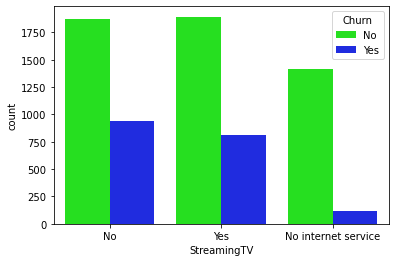

In [45]:
#plot count plot with hue=Churn
sns.countplot('StreamingTV',hue='Churn',palette='hsv',data=df);

In [46]:
#unique values
print(df['StreamingMovies'].unique())
#count the unique values
print(df['StreamingMovies'].value_counts())

['No' 'Yes' 'No internet service']
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


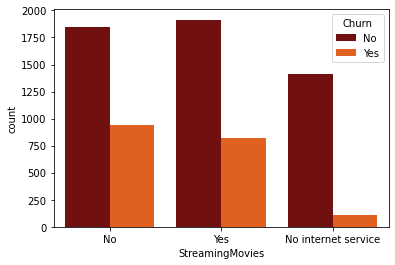

In [47]:
#plot count plot with hue=Churn
sns.countplot('StreamingMovies',hue='Churn',palette='gist_heat',data=df);

In [48]:
#unique values
print(df['StreamingMovies'].unique())
#count the unique values
print(df['StreamingMovies'].value_counts())

['No' 'Yes' 'No internet service']
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


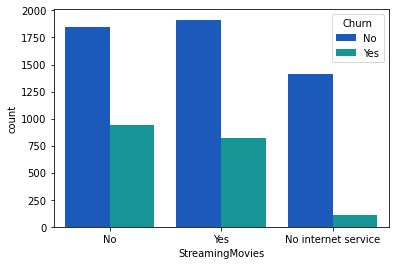

In [49]:
#plot count plot with hue=Churn
sns.countplot('StreamingMovies',hue='Churn',palette='winter',data=df);

In [50]:
#unique values
print(df['Contract'].unique())
#count the unique values
print(df['Contract'].value_counts())

['Month-to-month' 'One year' 'Two year']
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


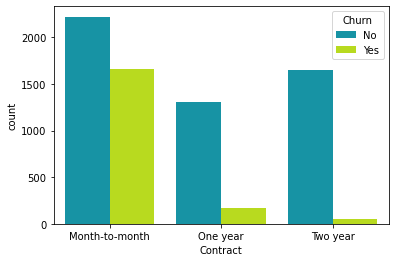

In [51]:
#plot count plot with hue=Churn
sns.countplot('Contract',hue='Churn',palette='nipy_spectral',data=df);

In [52]:
#unique values
print(df['PaperlessBilling'].unique())
#count the unique values
print(df['PaperlessBilling'].value_counts())

['Yes' 'No']
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


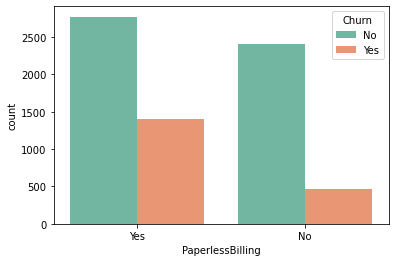

In [53]:
#plot count plot with hue=Churn
sns.countplot('PaperlessBilling',hue='Churn',palette='Set2',data=df);

In [54]:
#unique values
print(df['PaymentMethod'].unique())
#count the unique values
print(df['PaymentMethod'].value_counts())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


### Feature Engineering

In [55]:
df['PaymentMethod']=df['PaymentMethod'].replace('Electronic check','check')#both are check's only
df['PaymentMethod']=df['PaymentMethod'].replace('Mailed check','check')

In [56]:
#unique values
print(df['PaymentMethod'].unique())
#count the unique values
print(df['PaymentMethod'].value_counts())

['check' 'Bank transfer (automatic)' 'Credit card (automatic)']
check                        3977
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


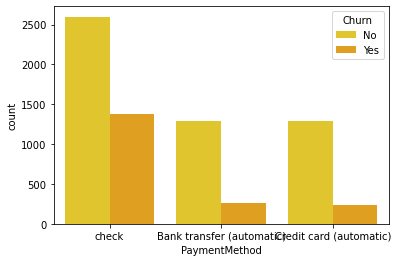

In [57]:
#plot count plot with hue=Churn
sns.countplot('PaymentMethod',hue='Churn',palette='Wistia',data=df);

In [58]:
#unique values
print(df['TotalCharges'].unique())
#count the unique values
print(df['TotalCharges'].value_counts())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
20.2       22
19.75       9
20.05       8
19.65       8
19.9        8
           ..
1033.9      1
4473        1
5965.95     1
346.45      1
890.5       1
Name: TotalCharges, Length: 6530, dtype: int64


In [59]:
#change object to integer
df['TotalCharges']=df['TotalCharges'].astype(float)

### Target Variable

In [60]:
#unique values
print(df['Churn'].unique())
#count the unique values
print(df['Churn'].value_counts())

['No' 'Yes']
No     5174
Yes    1869
Name: Churn, dtype: int64


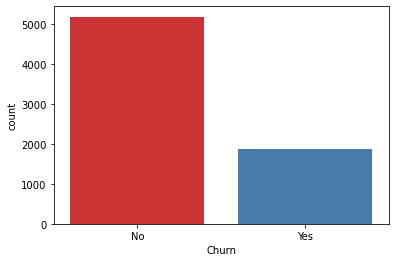

In [61]:
#plot count plot with hue=Churn
sns.countplot('Churn',palette='Set1',data=df);

Dataset is imbalanced bcz lot of differ b/w No and Yes

### Feature Engineering

In [62]:
df['Churn']=df['Churn'].replace('Yes',1)#replace Yes with 1 and No  with 0
df['Churn']=df['Churn'].replace('No',0)

### Label Encoder

Label Encoder to change object to integer or float

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
df_new=df.copy()

In [65]:
df_new=df_new.apply(LabelEncoder().fit_transform)

In [66]:
#describe the dataset
df.describe().T

count         mean          std    min     25%      50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.00   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.765853  2266.762876  18.80  398.55  1394.55   
Churn           7043.0     0.265370     0.441561   0.00    0.00     0.00   

                    75%      max  
SeniorCitizen      0.00     1.00  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80  
Churn              1.00     1.00

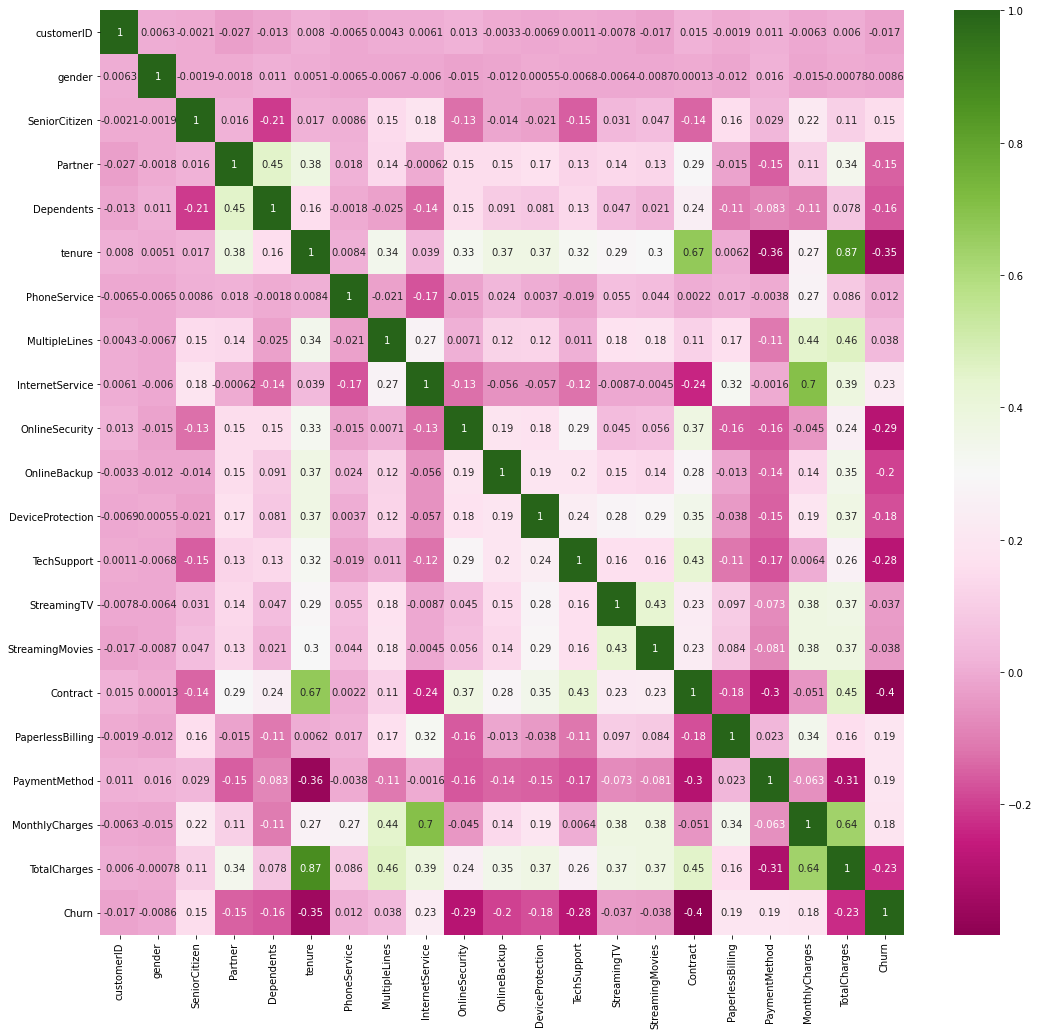

In [67]:
#checking correlation using heat map
plt.figure(figsize=(18,17))
sns.heatmap(df_new.corr(),annot=True,cmap='PiYG');

Green is Positive Correlation And Pink is Negative correlation

In [68]:
#checking correlation
df_new.corr()

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService     0.006094 -0.006026       0.182742 -0.000615   -0.139812   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.021398  0.166330    0.080537   
TechSupport         0.001140 -0.006825      -0.151268  0.126733    0.133524   
StreamingTV        -0.007777 -0.006421       0.030776  0.137341    0.046885   
StreamingMovies    -0.016746 -0.008743       0.047266  0.129574    0.021321   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011368  0.015651       0.028587 -0.153783   -0.083229   
MonthlyCharges     -0.006266 -0.014623       0.219524  0.106501   -0.107507   
TotalCharges        0.005971 -0.000778       0.108063  0.339716    0.077542   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316         0.006094   
gender            0.005106     -0.006488      -0.006739        -0.006026   
SeniorCitizen     0.016567      0.008576       0.146185         0.182742   
Partner           0.379697      0.017706       0.142410        -0.000615   
Dependents        0.159712     -0.001762      -0.024991        -0.139812   
tenure            1.000000      0.008448       0.343032         0.039062   
PhoneService      0.008448      1.000000      -0.020538        -0.172209   
MultipleLines     0.343032     -0.020538       1.000000         0.272964   
InternetService   0.039062     -0.172209       0.272964         1.000000   
OnlineSecurity    0.325468     -0.015198       0.007141        -0.128453   
OnlineBackup      0.370876      0.024105       0.117327        -0.055914   
DeviceProtection  0.371105      0.003727       0.122318        -0.057116   
TechSupport       0.322942     -0.019158       0.011466        -0.123866   
StreamingTV       0.289373      0.055353       0.175059        -0.008691   
StreamingMovies   0.296866      0.043870       0.180957        -0.004472   
Contract          0.671607      0.002247       0.110842        -0.242388   
PaperlessBilling  0.006152      0.016505       0.165146         0.321013   
PaymentMethod    -0.364805     -0.003771      -0.110225        -0.001625   
MonthlyCharges    0.268133      0.271209       0.444580         0.704818   
TotalCharges      0.872051      0.086357       0.462384         0.386505   
Churn            -0.352229      0.011942       0.038037         0.227890   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
customerID              0.013292     -0.003334         -0.006918     0.001140   
gender                 -0.015017     -0.012057          0.000549    -0.006825   
SeniorCitizen          -0.128221     -0.013632         -0.021398    -0.151268   
Partner                 0.150828      0.153130          0.166330     0.126733   
Dependents              0.152166      0.091015          0.080537     0.133524   
tenure                  0.325468      0.370876          0.371105     0.322942   
PhoneService           -0.015198      0

###### Observations:-

1. Dependents are good (High positive) correlation with Partner Variable.
2. Contract and TotalCharges high correlation with tenure variable
3. Churn are High Negative correlation with tenure variable
4. MonthlyCharges are high positive correlation with InternetService variable
5. MonthlyCharges are High Correlation with TotalCharges variable
6. Contract is high Negative correlation with Churn variable

In [69]:
df_target=df_new.corr()

In [70]:
df_target['Churn'].sort_values(ascending=False)

Churn               1.000000
InternetService     0.227890
PaperlessBilling    0.191825
PaymentMethod       0.187513
MonthlyCharges      0.183523
SeniorCitizen       0.150889
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.228844
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

###### Observations:-

1. InternetService high positive correlation with target variable
2. tenure and Contract are high negative correlation with target variable
3. PaymentMethod and PaperlessBilling positive correlation

### pair plot

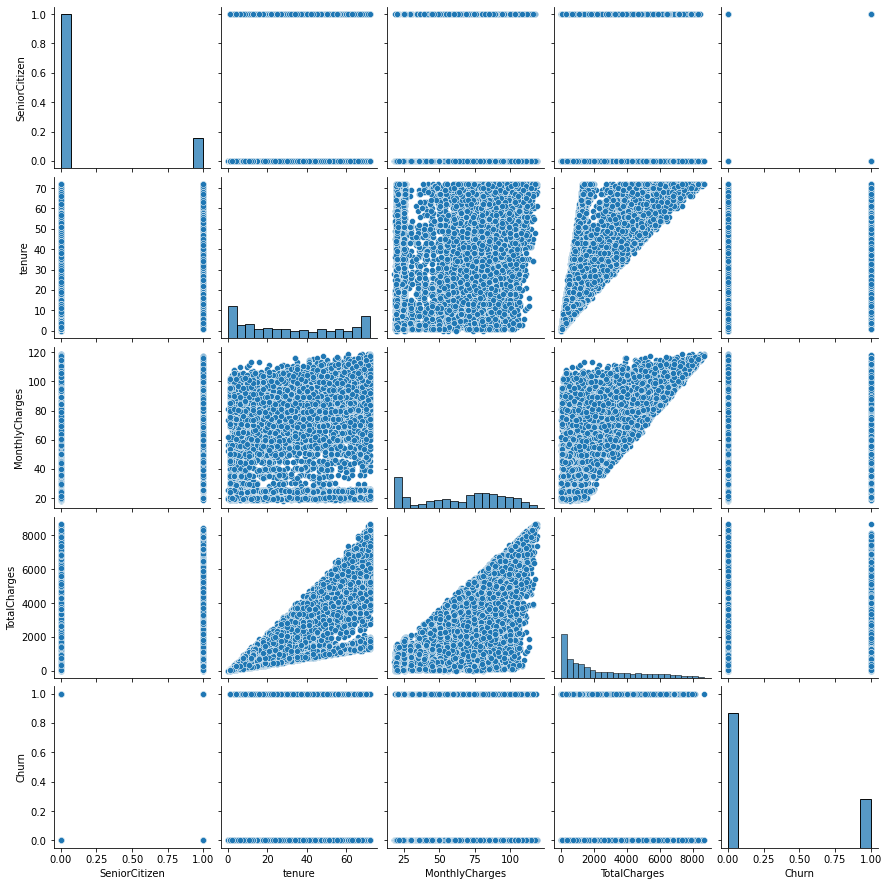

In [71]:
sns.pairplot(df)

### Scatter plot

In [72]:
sns.set_theme()

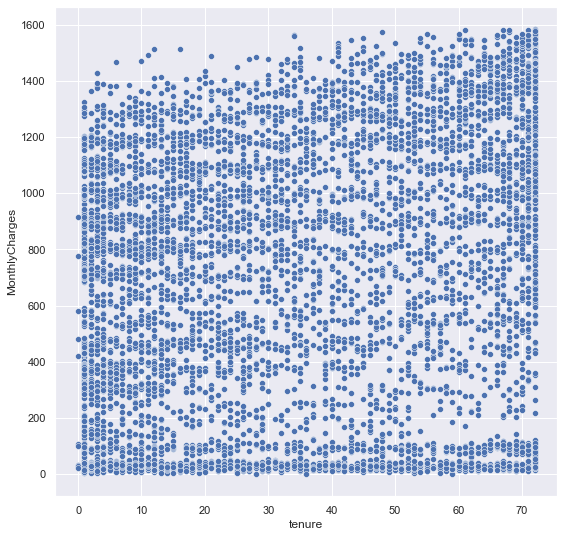

In [73]:
plt.figure(figsize=(9,9))
sns.scatterplot('tenure','MonthlyCharges',data=df_new);

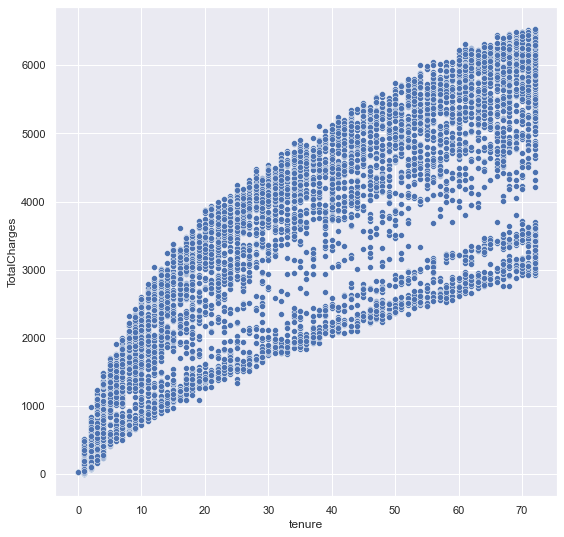

In [74]:
plt.figure(figsize=(9,9))
sns.scatterplot('tenure','TotalCharges',data=df_new);

If tensure increase Total charges also increase

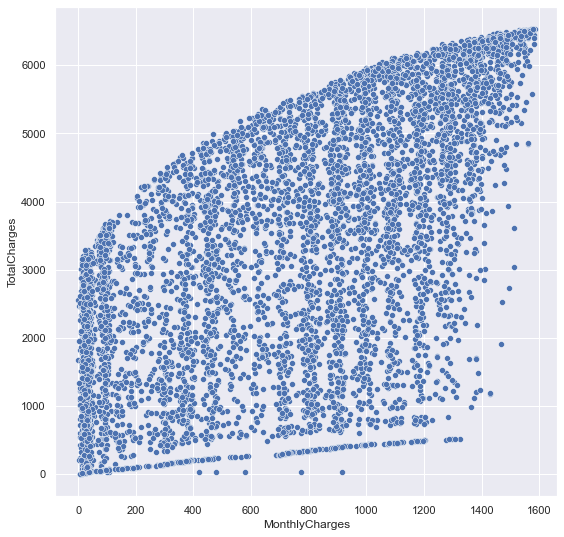

In [75]:
plt.figure(figsize=(9,9))
sns.scatterplot('MonthlyCharges','TotalCharges',data=df_new);

If monthly charges increase total charges also increase

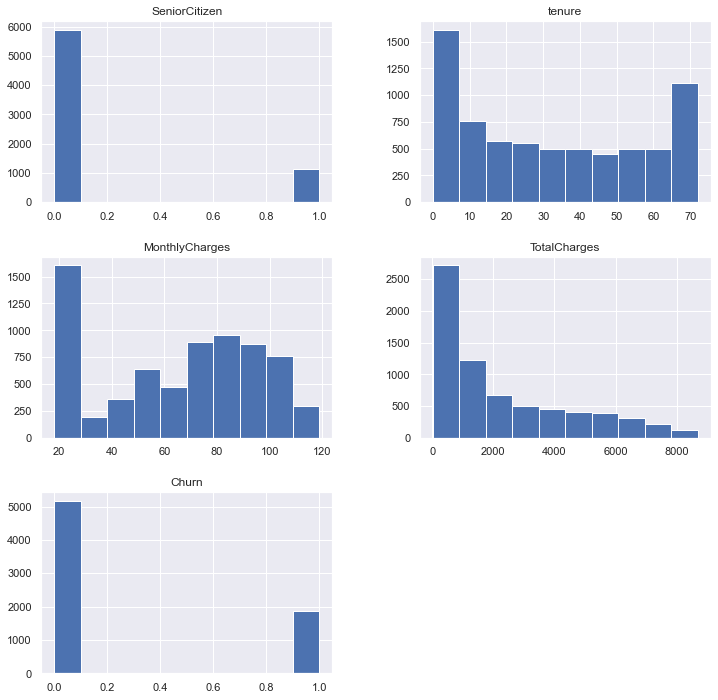

In [76]:
df.hist(figsize=(12,12),layout=(3,2),sharex=False);

In [77]:
px.pie(df,values='tenure',names='Churn',title='% of Churn',color_discrete_sequence=px.colors.qualitative.T10)

In [78]:
px.pie(df,values='MonthlyCharges',names='Churn',title='% of Churn',color_discrete_sequence=px.colors.qualitative.T10)

In [79]:
px.pie(df,values='TotalCharges',names='Churn',title='% of Churn',color_discrete_sequence=px.colors.qualitative.T10)

### SMOTE

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smt=SMOTE()

In [82]:
dfx=df_new.iloc[:,0:-1]
dfy=df_new.iloc[:,-1]

In [83]:
train_x,train_y=smt.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='Churn', ylabel='count'>

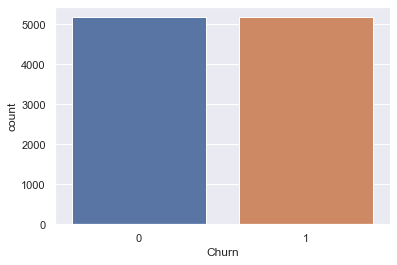

In [84]:
#count plot of target variable
sns.countplot(train_y)

In [85]:
#make dataframe 
df1=pd.DataFrame(train_x)

In [86]:
df1['Churn']=train_y

In [87]:
df1.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             0              1                1               0             2   
1             1              0                1               2             0   
2             1              0                1               2             2   
3             0              1                1               2             0   
4             1              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2             142            74      0  
1                 0              2             498          3624      0  
2                 1              2             436           536      1  
3                 0              0             266          3570      0  
4                 1              2             729           674      1

In [88]:
#checking shape
df1.shape

(10348, 21)

10348 rows and 21 columns

### Checking Outliers

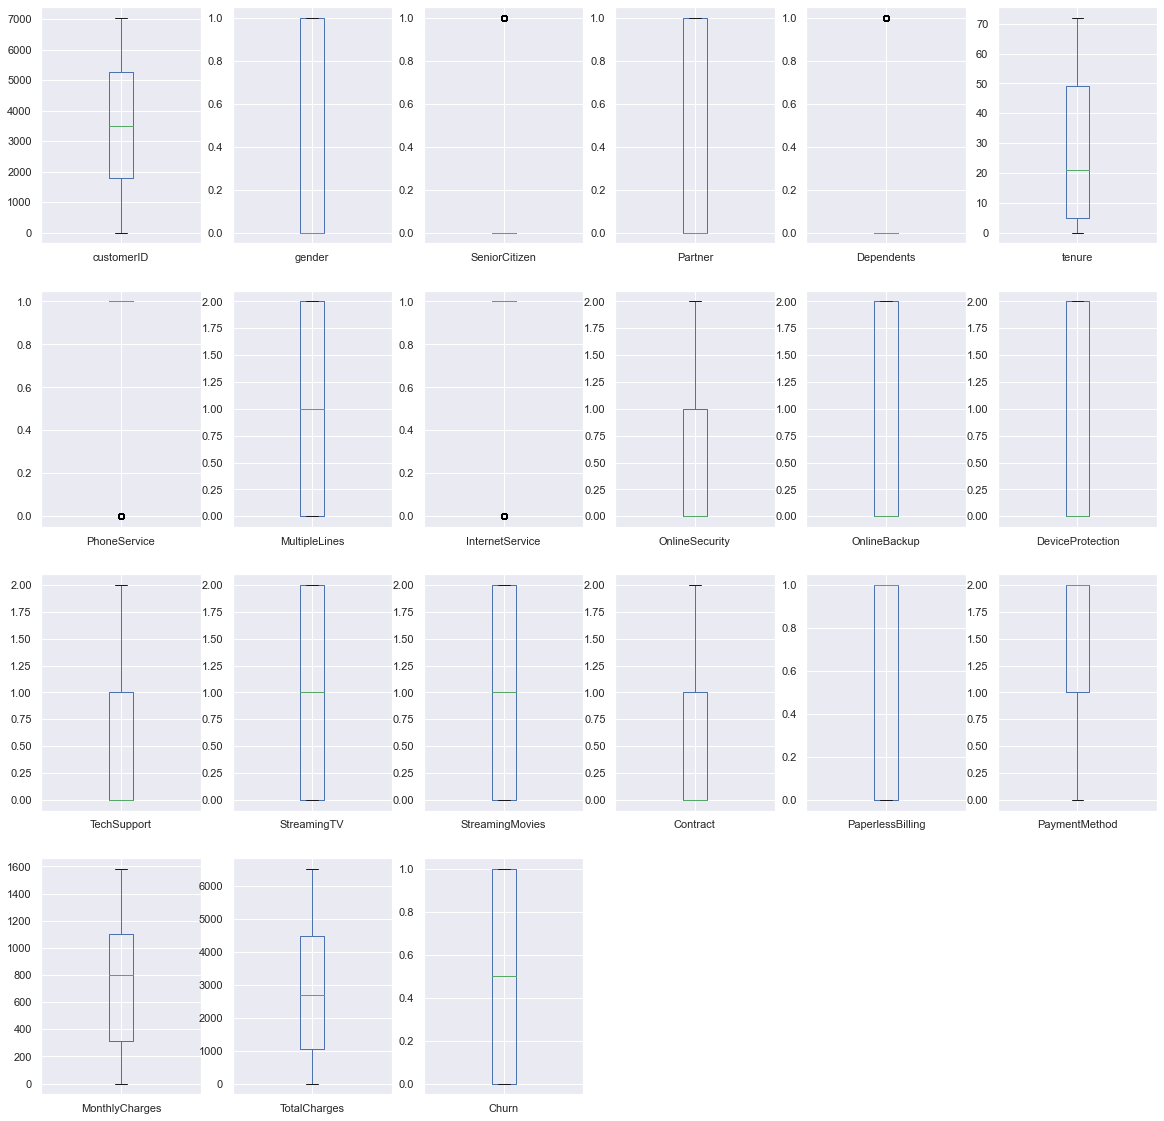

In [98]:
df1.plot(kind='box',subplots=True,layout=(4,6),figsize=(20,20));

In [90]:
from scipy.stats import zscore

In [91]:
z=np.abs(zscore(df1))

In [92]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


There is no Outliers in dataset

### Checking Skewness

In [108]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

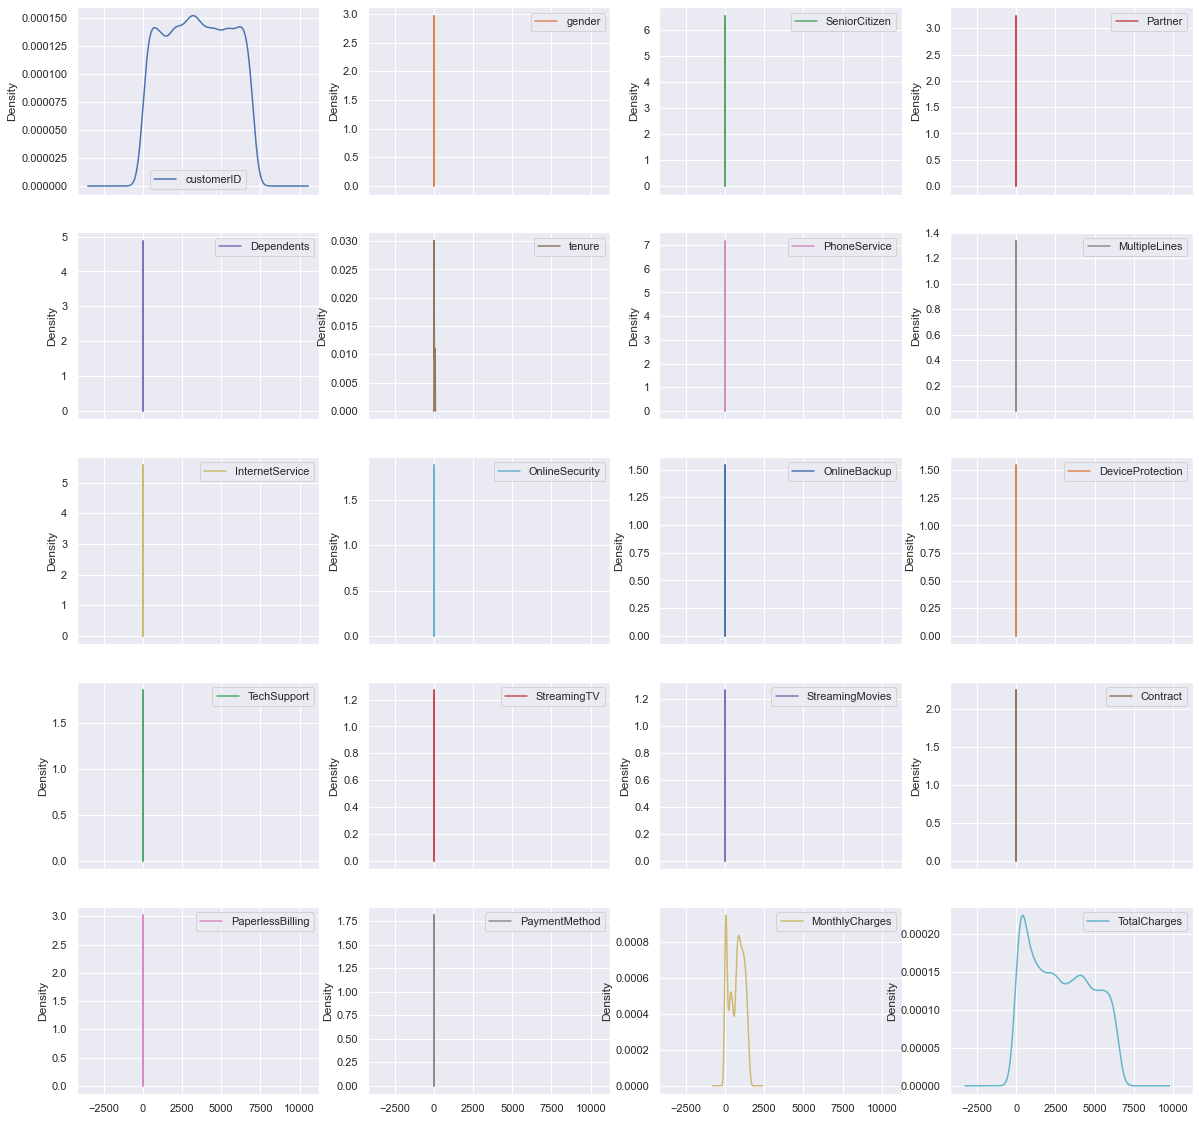

In [94]:
x.plot(kind='kde',subplots=True,layout=(5,4),figsize=(20,20));

In [95]:
x.skew().sort_values(ascending=False)

SeniorCitizen       2.195944
Dependents          1.409307
Contract            1.155476
OnlineSecurity      0.823754
TechSupport         0.800272
tenure              0.507684
DeviceProtection    0.499252
Partner             0.495893
OnlineBackup        0.494180
gender              0.318664
MultipleLines       0.220758
TotalCharges        0.191817
StreamingTV         0.181972
StreamingMovies     0.173123
customerID         -0.001226
MonthlyCharges     -0.159708
PaperlessBilling   -0.349688
PaymentMethod      -0.754755
InternetService    -1.739321
PhoneService       -2.485826
dtype: float64

#### Removing Skewness

In [96]:
from scipy.stats import boxcox

In [102]:
df['MonthlyCharges']=boxcox(df['MonthlyCharges'],0)

### VIF(Variance Inflation Factor)

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif

In [116]:
vif()

Variables  VIF Factor
0         customerID    3.769888
1             gender    1.770389
2      SeniorCitizen    1.252407
3            Partner    2.478449
4         Dependents    1.819853
5             tenure   33.237183
6       PhoneService    7.932804
7      MultipleLines    2.710565
8    InternetService   11.762413
9     OnlineSecurity    2.107203
10      OnlineBackup    2.249700
11  DeviceProtection    2.408034
12       TechSupport    2.224634
13       StreamingTV    3.226047
14   StreamingMovies    3.163062
15          Contract    3.889756
16  PaperlessBilling    2.771870
17     PaymentMethod    4.052934
18    MonthlyCharges   21.782313
19      TotalCharges   53.596779

In [118]:
#Contract,StreamingMovies,StreamingTV,customerID as VIF Factor 
x.drop('customerID',inplace=True,axis=1)
x.drop('StreamingMovies',inplace=True,axis=1)
#PaperlessBilling,TechSupport,DeviceProtection,OnlineBackup,OnlineSecurity,MultipleLines,Partner as same VIF Factor
x.drop('Partner',inplace=True,axis=1)
x.drop('MultipleLines',inplace=True,axis=1)
x.drop('OnlineSecurity',inplace=True,axis=1)
#Dependents,SeniorCitizen,gender as same VIF Factor
x.drop('gender',inplace=True,axis=1)
x.drop('Dependents',inplace=True,axis=1)

### Standard Scaling

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scale=MinMaxScaler()

In [121]:
x=scale.fit_transform(x)

In [122]:
x.shape

(10348, 13)

In [123]:
y.shape

(10348,)

### Model Selection

In [124]:
#model selecting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [125]:
lg=LogisticRegression()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [126]:
list_model=[lg,gnb,dtc,knc,svc,rfc,gbc,abc]

### LogisticRegression

In [127]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Oranges',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [132]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8082125603864734 Maximum Random Number:- 28


accuracy_score:- 0.8082125603864734
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       985
           1       0.84      0.79      0.81      1085

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



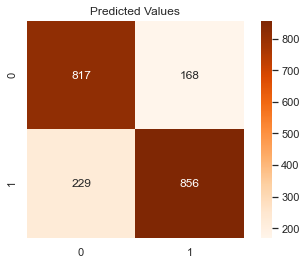

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=28)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
confusion_plot()

### GaussianNB

In [161]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Greens',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [134]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gnb.fit(x_train,y_train)
    pred=gnb.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.7884057971014493 Maximum Random Number:- 97


accuracy_score:- 0.7884057971014493
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       919
           1       0.85      0.75      0.80      1151

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.80      0.79      0.79      2070



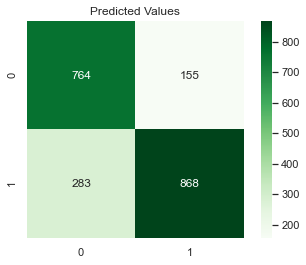

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=97)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
confusion_plot()

### DecisionTreeClassifier

In [136]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Blues',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [137]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8067632850241546 Maximum Random Number:- 28


accuracy_score:- 0.8140096618357487
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1049
           1       0.81      0.81      0.81      1021

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



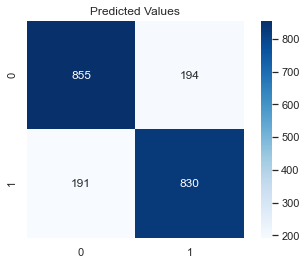

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=28)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
confusion_plot()

### KNeighborsClassifier

In [139]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='Reds',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [140]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8140096618357487 Maximum Random Number:- 70


accuracy_score:- 0.8140096618357487
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       979
           1       0.84      0.80      0.82      1091

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



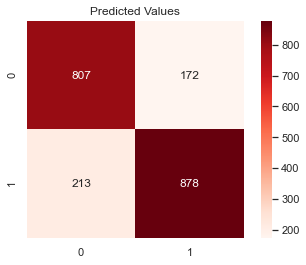

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=70)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
confusion_plot()

### Support Vector Classifier

In [142]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='crest',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [144]:
maxacc=0
maxrn=0

for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.827536231884058 Maximum Random Number:- 35


accuracy_score:- 0.827536231884058
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       978
           1       0.85      0.81      0.83      1092

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



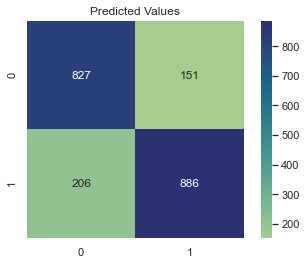

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=35)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
confusion_plot()

### RandomForestClassifier

In [146]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='viridis',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [148]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8516908212560387 Maximum Random Number:- 28


accuracy_score:- 0.851207729468599
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1040
           1       0.85      0.85      0.85      1030

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



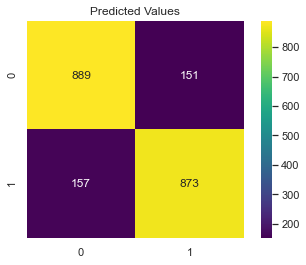

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=28)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

### GradientBoostingClassifier

In [150]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='pink',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [152]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8473429951690822 Maximum Random Number:- 91


accuracy_score:- 0.8473429951690822
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       980
           1       0.89      0.81      0.85      1090

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



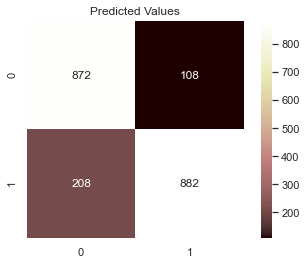

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
confusion_plot()

### AdaBoostClassifier

In [154]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix=confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,cmap='icefire',square=True,fmt="d")
    plt.title('Predicted Values')
    plt.show()

In [156]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('Accuracy score:-',maxacc,'Maximum Random Number:-',maxrn)

Accuracy score:- 0.8265700483091788 Maximum Random Number:- 28


accuracy_score:- 0.8265700483091788
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       979
           1       0.86      0.80      0.83      1091

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



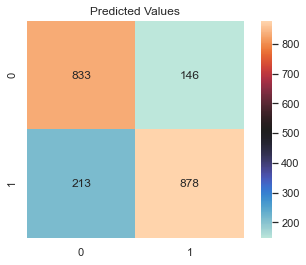

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=28)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

### Cross Validation

In [159]:
for model in list_model:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())

LogisticRegression()
[0.747343   0.74927536 0.81111111 0.80908652 0.82455292]
0.7882737815883422
GaussianNB()
[0.73768116 0.75120773 0.77826087 0.77573707 0.77670372]
0.7639181102215125
DecisionTreeClassifier()
[0.70434783 0.7173913  0.82898551 0.80521991 0.82696955]
0.7765828202380203
KNeighborsClassifier()
[0.70483092 0.74251208 0.82850242 0.83663606 0.84388594]
0.7912734803856329
SVC()
[0.73188406 0.74444444 0.83671498 0.84823586 0.84726921]
0.8017097106352574
RandomForestClassifier()
[0.72801932 0.76570048 0.87198068 0.87868536 0.89270179]
0.8274175253278789
GradientBoostingClassifier()
[0.73671498 0.75458937 0.84541063 0.85451909 0.86273562]
0.8107939376533739
AdaBoostClassifier()
[0.73381643 0.75072464 0.83091787 0.83663606 0.84146931]
0.7987128604217306


### RandomForestClassifier is best model

accuracy_score:- 0.8516908212560387
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1035
           1       0.86      0.85      0.85      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



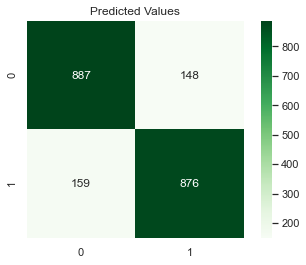

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=28)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()

### Hyperparameters for a model

In [163]:
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}

In [164]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best score:', rfc_grid.best_score_)
    print('Best score:', rfc_grid.best_params_)
    print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8237498533565161
Best score: {'criterion': 'entropy', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(criterion='entropy', max_features='sqrt')
Best score: 0.8242329254254781
Best score: {'criterion': 'gini', 'max_features': 'log2'}
Best score: RandomForestClassifier(max_features='log2')
Best score: 0.8255623421924486
Best score: {'criterion': 'entropy', 'max_features': 'log2'}
Best score: RandomForestClassifier(criterion='entropy', max_features='log2')
Best score: 0.8274951568209129
Best score: {'criterion': 'entropy', 'max_features': 'log2'}
Best score: RandomForestClassifier(criterion='entropy', max_features='log2')
Best score: 0.8296709426569414
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.8297902708864782
Best score: {'criterion': 'gini', 'max_features': 'sqrt'}
Best score: RandomForestClassifier(max_features='sqrt')
Best score: 0.8323275930043683
Best score: {'criterion': '

In [165]:
rfc_grid = GridSearchCV(rfc, random_forest_params, cv=9)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)

Best score: 0.8305141589524425
Best score: {'criterion': 'entropy', 'max_features': 'auto'}
Best score: RandomForestClassifier(criterion='entropy')


### ROC Curve

In [166]:
pred_prob=rfc.predict_proba(x_test)

In [167]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=2

In [168]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

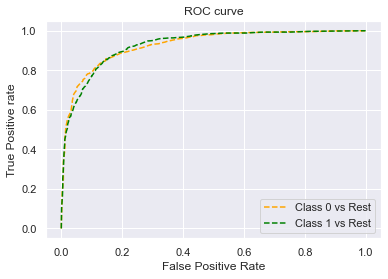

In [169]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC curve',dpi=300); 

### Save the model

In [170]:
import joblib

In [171]:
#save the model
joblib.dump(rfc,'customer_churn_rfc.obj')

['customer_churn_rfc.obj']

In [172]:
#load the model
loaded_model=joblib.load('customer_churn_rfc.obj')

In [173]:
#test the model is working or not
loaded_model.predict(x_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)